In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes.Axes as ax
from scipy.io import loadmat
from importlib import reload


1.0


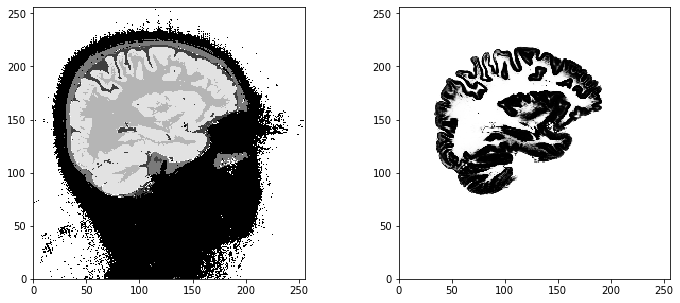

In [67]:
fig, axis = plt.subplots(1,2, figsize=(12,5))

tissue_prob_map = loadmat('/home/anne/Masterarbeit/masterarbeit/2d//data/T1SliceAnne.mat')
#print(tissue_prob_map)

gray_prob = tissue_prob_map['T1Slice']['gray'][0][0]
white_prob = tissue_prob_map['T1Slice']['white'][0][0]
skull_prob = tissue_prob_map['T1Slice']['skull'][0][0]
csf_prob = tissue_prob_map['T1Slice']['csf'][0][0]
scalp_prob = tissue_prob_map['T1Slice']['scalp'][0][0]

x = np.linspace(0, 1, 256)
y = np.linspace(0, 1, 256)
z = np.ndarray((256,256))
zz = np.ndarray((256,256))
g = np.ndarray((256,256))

for i in range(256):
    for j in range(256):
        probs = [gray_prob[i,j],white_prob[i,j],skull_prob[i,j],csf_prob[i,j],scalp_prob[i,j]]
        g[j,i] = gray_prob[i,j]
        if gray_prob[i,j]>0.5: 
            z[j,i]=1
        elif white_prob[i,j]>0.5: 
            z[j,i]=2
        elif skull_prob[i,j]>0.5: 
            z[j,i]=3
        elif csf_prob[i,j]>0.5: 
            z[j,i]=4
        elif scalp_prob[i,j]>0.5: 
            z[j,i]=5
        else:
            z[j,i]=0

set = axis[0].pcolor(z, cmap='Greys')
set = axis[1].pcolor(g, cmap='Greys')
axis[0].set_aspect(1)
axis[1].set_aspect(1)

print(z[170,150])
plt.show()


In [90]:
import structured_mesh 
reload(structured_mesh)

center = [128, 128]
center = np.array(center)

path = "/home/anne/Masterarbeit/masterarbeit/2d/data/mesh_hex_256.npz"
mesh = structured_mesh.StructuredMesh(1,path)

print(mesh.nodes)


Created new mesh with 
 66049 nodes 
 65536 elements

[[  0   0]
 [  1   0]
 [  2   0]
 ...
 [254 256]
 [255 256]
 [256 256]]


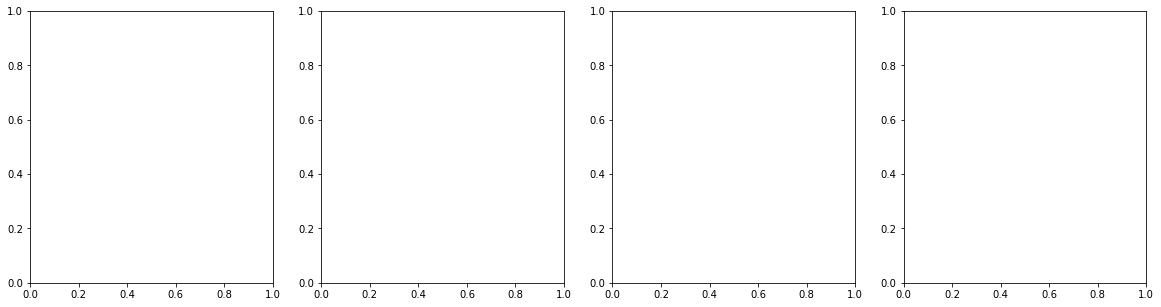

In [92]:
from os import name

fig, axis = plt.subplots(1,4, figsize=(20,5))

paths = [
    "/home/anne/Masterarbeit/masterarbeit/2d/data/mesh_hex_32.npz",
    "/home/anne/Masterarbeit/masterarbeit/2d/data/mesh_hex_64.npz",
    "/home/anne/Masterarbeit/masterarbeit/2d/data/mesh_hex_128.npz",
    "/home/anne/Masterarbeit/masterarbeit/2d/data/mesh_hex_256.npz"]
numbers = [32,64,128,256]

for i in range(4):
    n = numbers[i]

    mesh = np.load(paths[i])

    elements = mesh['elements']
    nodes = mesh['nodes']
    labels = mesh['labels']
    gray_probs = mesh['gray_probs']

    x = np.zeros(n+1)
    y = np.zeros(n+1)
    z = np.ndarray((n,n))
    g = np.ndarray((n,n))

    x = nodes[:n,0]
    y = nodes[:n,0]

    for i in range(n):
        for j in range(n):
            z[i,j] = labels[i+n*j]

    #axis[i].pcolormesh(x,y,z)

plt.show()
